In [15]:
!pip install snowflake-connector-python

In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
import snowflake.connector

#Creating connection with Snowflake
conn = snowflake.connector.connect(
        user='sithikranjanvr',
        password='Sithik@19092006',
        account='UQTARTH-RT64762',
        warehouse='COMPUTE_WH',
        database='MEG_DB',
        schema='PUBLIC'
    )
print("Successfully connected to Snowflake and warehouse set!")

Successfully connected to Snowflake and warehouse set!


In [29]:
#Displaying the table
q='SELECT * FROM "DRUG"'
df=pd.read_sql(q,conn)
print(df.head())

/tmp/ipython-input-3650251582.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(q,conn)


   AGE SEX      BP CHOLESTEROL  NA_TO_K   DRUG
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [30]:
for i in df.columns:
  print(df[i].name,df[i].nunique())

AGE 57
SEX 2
BP 3
CHOLESTEROL 2
NA_TO_K 198
DRUG 5


In [31]:
df.head()

,AGE,SEX,BP,CHOLESTEROL,NA_TO_K,DRUG
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [32]:
df.isnull().sum()

,0
AGE,0
SEX,0
BP,0
CHOLESTEROL,0
NA_TO_K,0
DRUG,0


In [36]:
label_encoders = {}

for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

df.head()


,AGE,SEX,BP,CHOLESTEROL,NA_TO_K,DRUG
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [38]:
X = df.drop('DRUG', axis=1)
y = df['DRUG']

X, y

(     AGE  SEX  BP  CHOLESTEROL  NA_TO_K
 0     23    0   0            0   25.355
 1     47    1   1            0   13.093
 2     47    1   1            0   10.114
 3     28    0   2            0    7.798
 4     61    0   1            0   18.043
 ..   ...  ...  ..          ...      ...
 195   56    0   1            0   11.567
 196   16    1   1            0   12.006
 197   52    1   2            0    9.894
 198   23    1   2            1   14.020
 199   40    0   1            1   11.349
 
 [200 rows x 5 columns],
 0      0
 1      3
 2      3
 3      4
 4      0
       ..
 195    3
 196    3
 197    4
 198    4
 199    4
 Name: DRUG, Length: 200, dtype: int64)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((150, 5), (50, 5))

In [40]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred = nb_model.predict(X_test)
y_pred

array([4, 1, 4, 3, 0, 2, 0, 4, 1, 4, 1, 4, 3, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1, 4, 4, 4, 0,
       0, 3, 3, 0, 2, 4])

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        20
           1       0.86      1.00      0.92         6
           2       0.60      1.00      0.75         3
           3       0.75      1.00      0.86         6
           4       1.00      1.00      1.00        15

    accuracy                           0.90        50
   macro avg       0.84      0.95      0.88        50
weighted avg       0.93      0.90      0.90        50



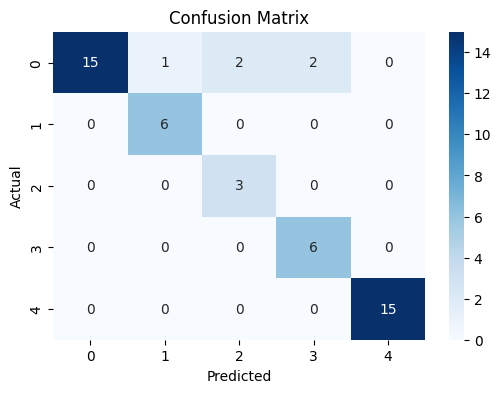

In [44]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()